In [ ]:
import numpy as np
import cv2
import os
import zipfile
from PIL import Image
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install requests

In [ ]:
# Definir o endereço para baixar arquivo
!wget -P /content/drive/MyDrive/ELT579/Problema4 https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip


--2023-11-09 21:05:27--  https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 18.238.243.95, 18.238.243.85, 18.238.243.111, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|18.238.243.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/content/drive/MyDrive/ELT579/Problema4/cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  25.7MB/s    in 13s     

2023-11-09 21:05:41 (25.4 MB/s) - ‘/content/drive/MyDrive/ELT579/Problema4/cell_images.zip’ saved [353452851/353452851]



In [ ]:
# Extrair conteúdo dos arquivos comprimidos
local_zip = '/content/drive/MyDrive/ELT579/Problema4/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/ELT579/Problema4')
zip_ref.close()

In [ ]:
pasta = '/content/drive/MyDrive/ELT579/Problema4/cell_images/'

positivas = os.listdir(pasta + 'Parasitized/')

negativas = os.listdir(pasta + 'Uninfected/')

In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if(image_name.split('.')[1] == 'png'):
    img = cv2.imread(pasta + 'Parasitized/' + image_name)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((SIZE, SIZE))
    dataset.append(np.array(img))
    label.append(1)

for i, image_name in enumerate(negativas):
  if(image_name.split('.')[1] == 'png'):
    img = cv2.imread(pasta + 'Uninfected/' + image_name)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((SIZE, SIZE))
    dataset.append(np.array(img))
    label.append(0)

label =  0
imagem


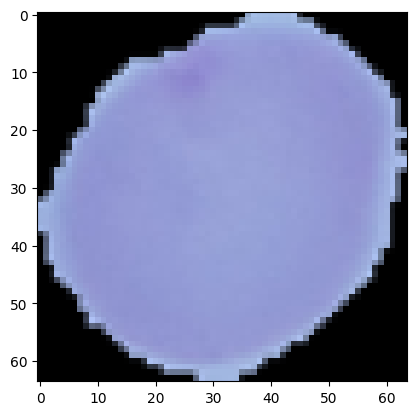

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-2])

print('imagem')
plt.imshow(dataset[-2])

In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))



In [ ]:
print(np.shape(X))

(27558, 64, 64, 3)


In [ ]:
print(np.shape(y))

(27558, 2)


In [ ]:
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(17636, 64, 64, 3)
(17636, 2)


In [ ]:
print(np.shape(X_test))

print(np.shape(y_test))

(5512, 64, 64, 3)
(5512, 2)


In [ ]:
print(np.shape(X_val))

print(np.shape(y_val))

(4410, 64, 64, 3)
(4410, 2)


In [ ]:
TAM = (SIZE, SIZE, 3)

inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv3)
drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)

conv4 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop3)
pool4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv4)
drop4 = tf.keras.layers.Dropout(rate = 0.2)(pool4)

conv5 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop4)
pool5 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv5)
drop5 = tf.keras.layers.Dropout(rate = 0.2)(pool5)

flat = tf.keras.layers.Flatten()(drop5)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop6 = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop6)
drop7 = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation = 'sigmoid')(drop7)

model = tf.keras.Model(inputs = inp, outputs = out)

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = 'accuracy')

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                      

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(
 #                     patience=10,
  #                    min_delta=0.001,
   #                   monitor="val_loss",
    #                  restore_best_weights=True
#)

history = model.fit(X_train,
                    y_train,
                    batch_size = 32,
                    validation_split = 0.1,
 #                   callbacks=[callback],
                    epochs = 100, verbose = 1)

Epoch 1/100
496/496 [==============================] - 109s 219ms/step - loss: 0.4146 - accuracy: 0.7665 - val_loss: 0.1545 - val_accuracy: 0.9546
Epoch 2/100
496/496 [==============================] - 102s 205ms/step - loss: 0.1695 - accuracy: 0.9502 - val_loss: 0.1461 - val_accuracy: 0.9598
Epoch 3/100
496/496 [==============================] - 110s 221ms/step - loss: 0.1664 - accuracy: 0.9506 - val_loss: 0.1445 - val_accuracy: 0.9541
Epoch 4/100
496/496 [==============================] - 101s 204ms/step - loss: 0.1575 - accuracy: 0.9527 - val_loss: 0.1558 - val_accuracy: 0.9575
Epoch 5/100
496/496 [==============================] - 107s 215ms/step - loss: 0.1510 - accuracy: 0.9539 - val_loss: 0.1512 - val_accuracy: 0.9586
Epoch 6/100
496/496 [==============================] - 106s 213ms/step - loss: 0.1482 - accuracy: 0.9550 - val_loss: 0.1346 - val_accuracy: 0.9603
Epoch 7/100
496/496 [==============================] - 102s 205ms/step - loss: 0.1445 - accuracy: 0.9558 - val_loss: 0

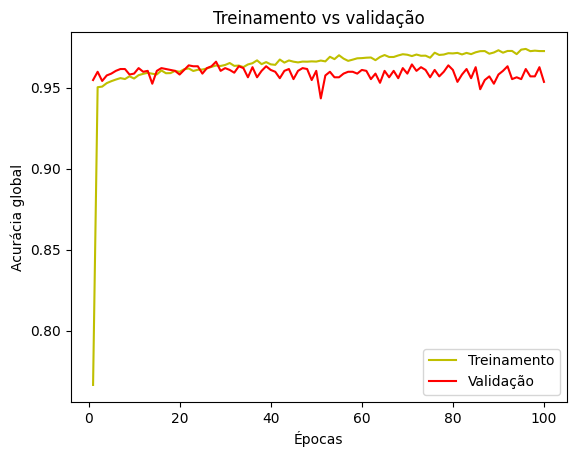

In [ ]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento vs validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia global")
plt.legend()

plt.show()

In [ ]:
_,score = model.evaluate(X_val, y_val)
print(score)

138/138 [==============================] - 8s 61ms/step - loss: 0.1798 - accuracy: 0.9549
0.9548752903938293


In [ ]:
#model.save('malaria_model_v1.h5')

In [ ]:
#from tensorflow.keras.models import load_model

#model = load_model('malaria_model_v1.h5')

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int).reshape(-1,)
y_test = y_test.astype(int).reshape(-1,)

173/173 [==============================] - 8s 44ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      5512
           1       1.00      0.24      0.39      5512

    accuracy                           0.62     11024
   macro avg       0.78      0.62      0.56     11024
weighted avg       0.78      0.62      0.56     11024

